In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q1 = QuantumRegister(5,name='qubit')
c1 = ClassicalRegister(5,name='bits')
qc1 = QuantumCircuit(q1,c1)

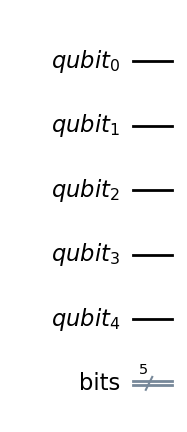

In [2]:
qc1.draw('mpl')

In [3]:
for i in range(5):
    qc1.x(q1[i])
    qc1.h(q1[i])
qc1.barrier()
for i in range(2):
    qc1.y(q1[i])
qc1.barrier()
for i in range(2,5):
    qc1.z(q1[i])

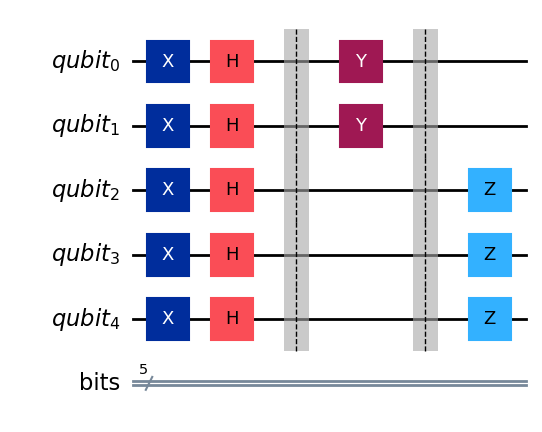

In [4]:
qc1.draw('mpl')

In [5]:
print(qc1.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{qubit}_{0} :  } & \lstick{{qubit}_{0} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{4} & \qw & \gate{\mathrm{Y}} \barrier[0em]{4} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{1} :  } & \lstick{{qubit}_{1} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \gate{\mathrm{Y}} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{2} :  } & \lstick{{qubit}_{2} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{3} :  } & \lstick{{qubit}_{3} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{4} :  } & \lstick{{qubit}_{4} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{\mathrm{{bits} :  }} & \lstick{\mathrm{{bits} :  }} &

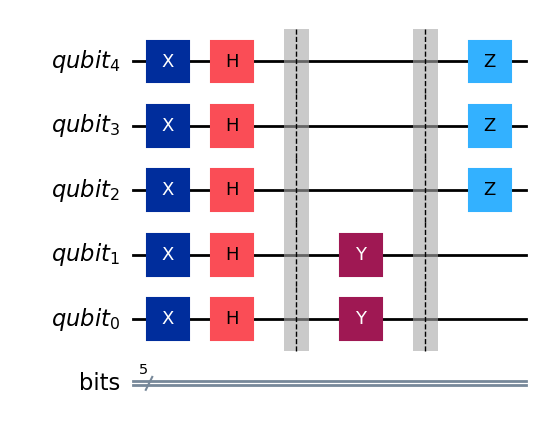

In [6]:
qc1.draw('mpl',reverse_bits=True)

C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


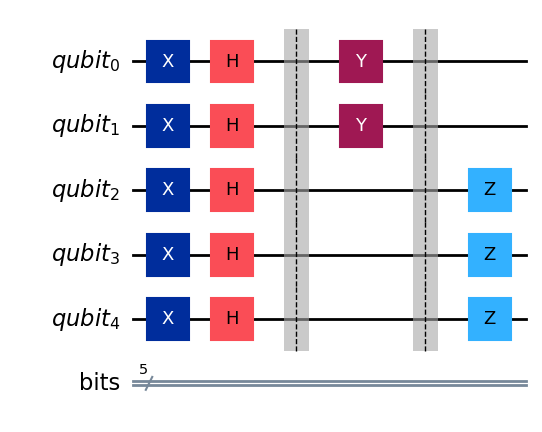

In [7]:
qc1.draw('mpl',style='iqx')

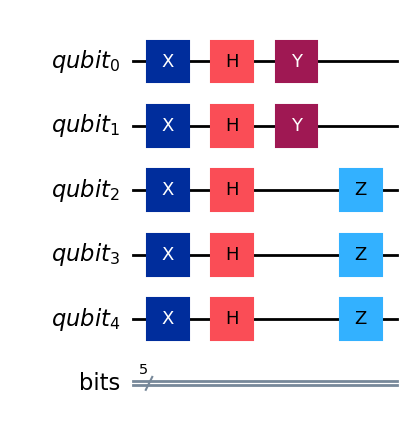

In [8]:
qc1.draw('mpl',plot_barriers=False)

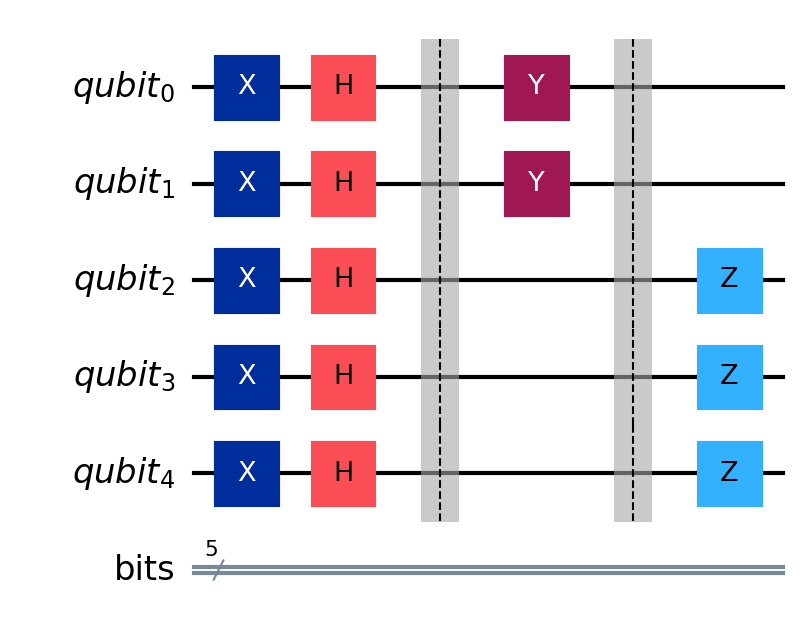

In [9]:
qc1.draw('mpl',scale=1.5)

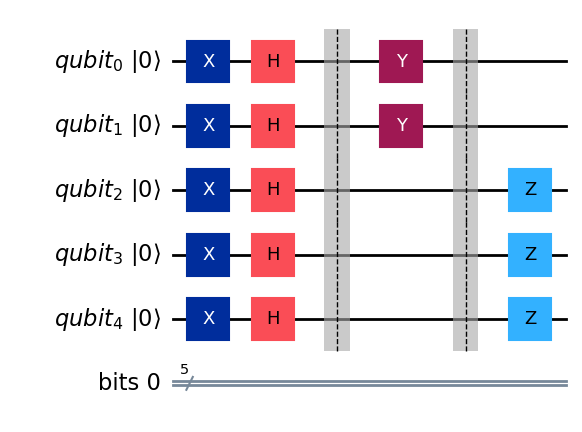

In [10]:
qc1.draw('mpl',initial_state=True)

In [11]:
qc1.measure_all()

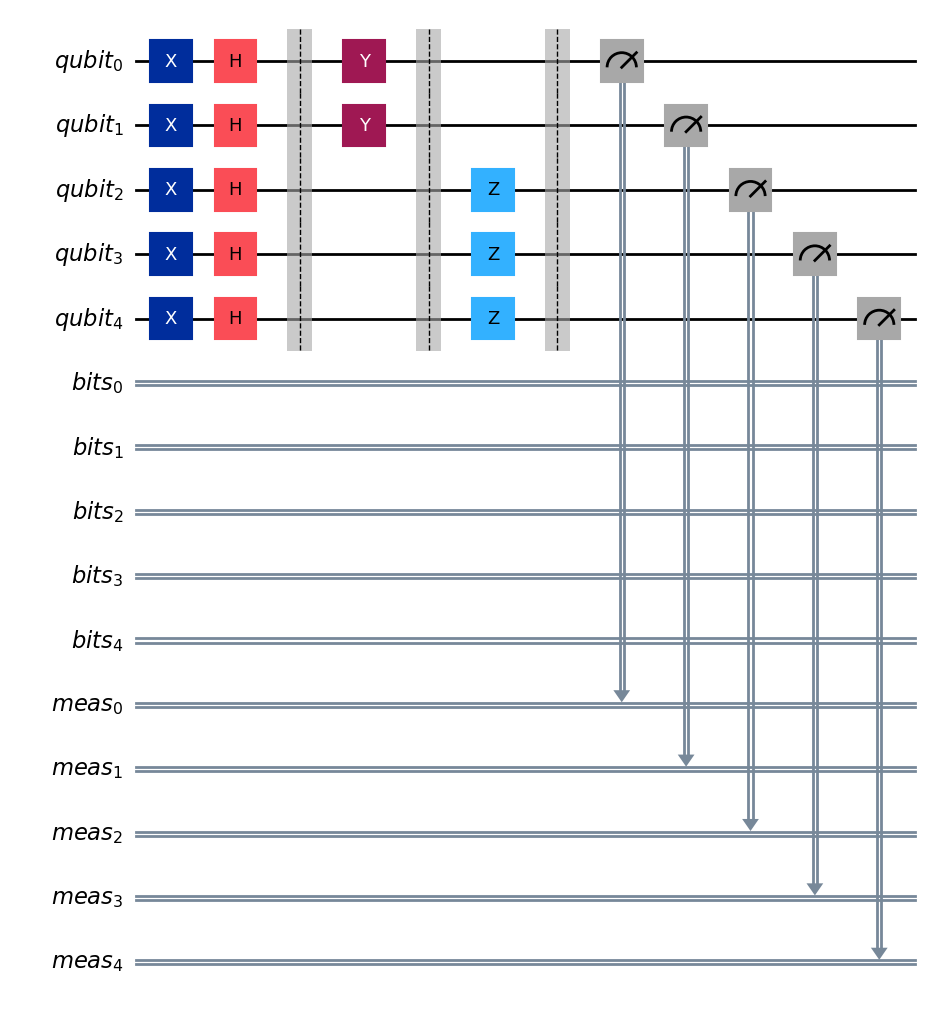

In [12]:
qc1.draw('mpl',cregbundle=False)

In [13]:
q2 = QuantumRegister(5)
qc2 = QuantumCircuit(q2)

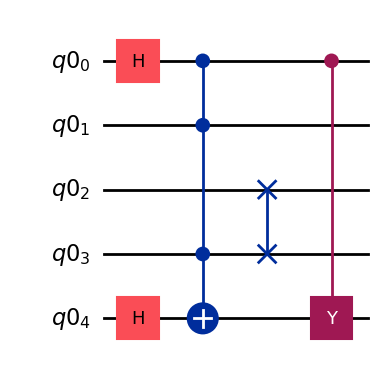

In [14]:
qc2.h(q2[0])
qc2.h(q2[4])
qc2.mcx([q2[0],q2[1],q2[3]],q2[4])
qc2.swap(q2[2],q2[3])
qc2.cy(q2[0],q2[4])
qc2.draw('mpl')

In [15]:
inverse_circuit = qc2.inverse()

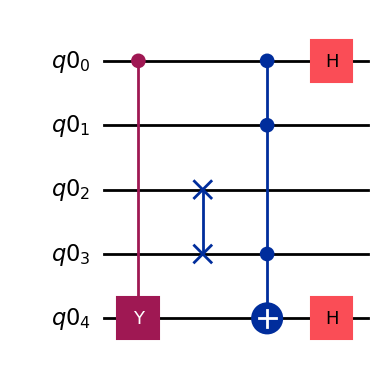

In [16]:
inverse_circuit.draw('mpl')

In [17]:
gate_01 = qc2.to_gate()

In [18]:
q3 = QuantumRegister(7)
c3 = ClassicalRegister(7)
qc3 = QuantumCircuit(q3,c3)

In [46]:
qc3.append(gate_01,[q3[1],q3[2],q3[3],q3[4],q3[5]])

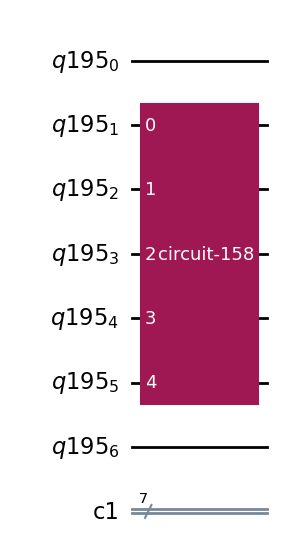

In [47]:
qc3.draw('mpl')

In [48]:
qc3.depth()

1

In [49]:
qc3.width()

14

In [50]:
from qiskit_ibm_runtime.fake_provider import FakeCambridgeV2

In [51]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [52]:
backend = FakeCambridgeV2()

In [53]:
backend

In [54]:
props = backend.properties()

In [55]:
for i in range(backend.configuration().n_qubits):
    print('The U gate have lenght',props.gate_length('u3',i)*1e9,'nanosecs')

The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.3478260

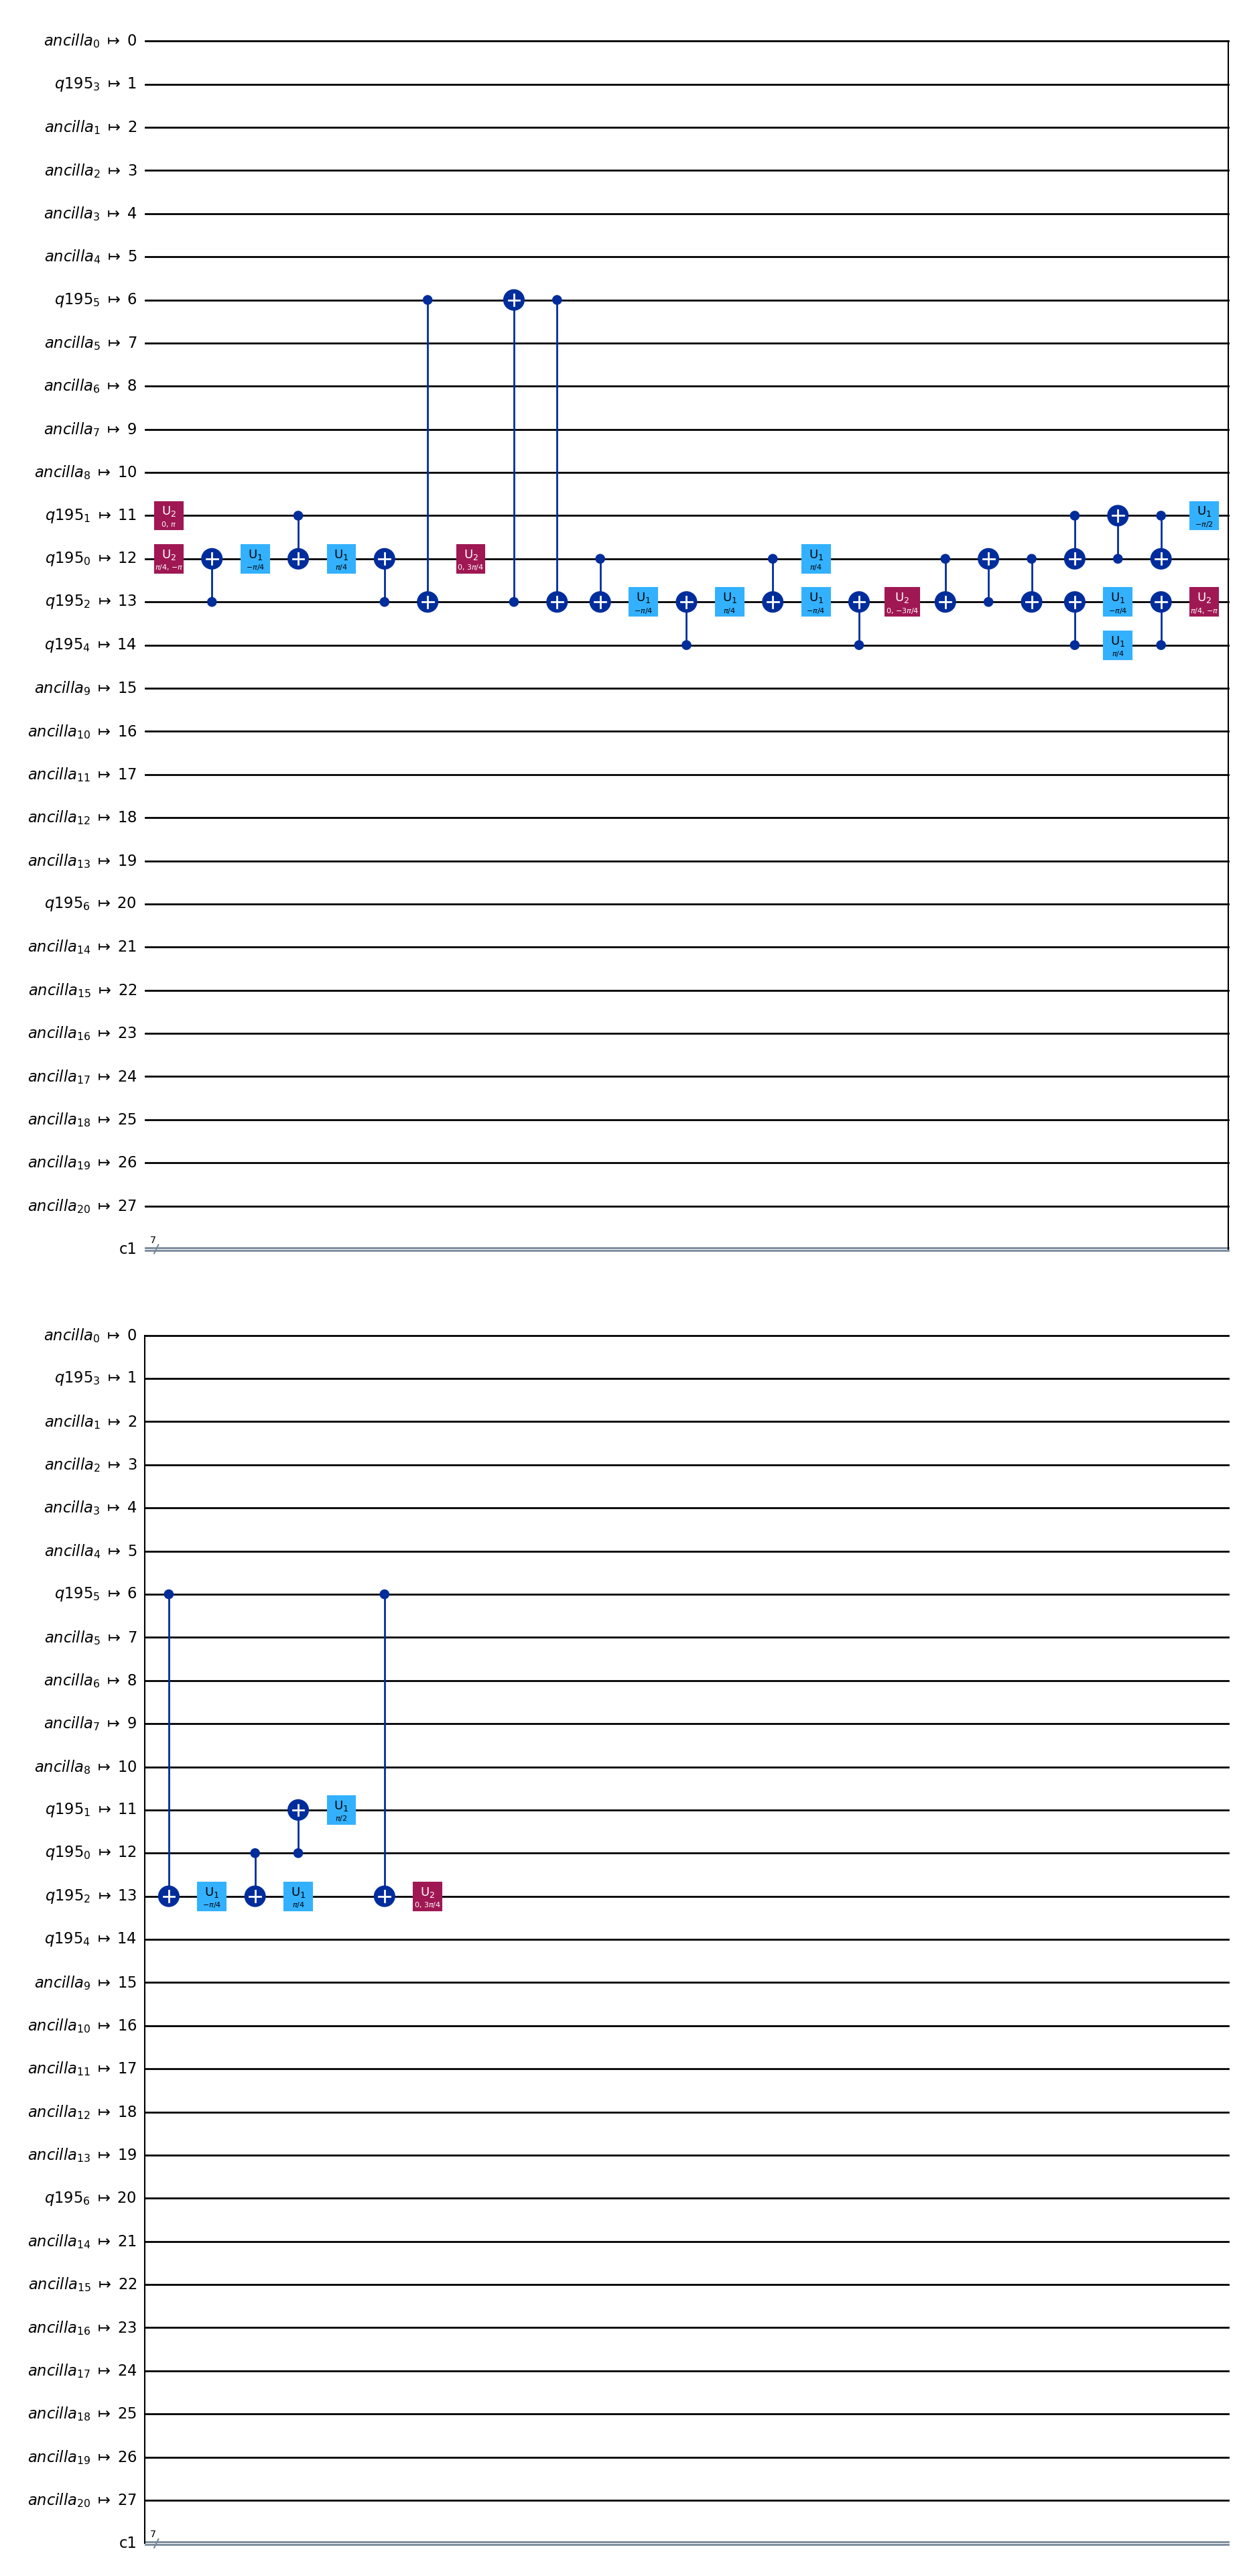

In [56]:
from qiskit import transpile
qc_compiled = transpile(qc3,backend)
qc_compiled.draw('mpl')

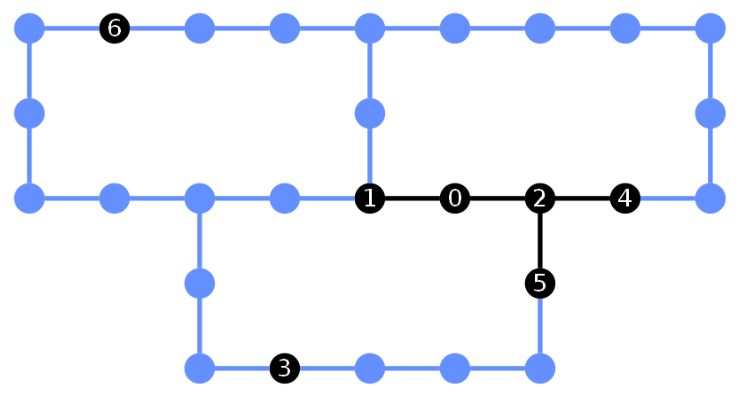

In [57]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_compiled,backend)

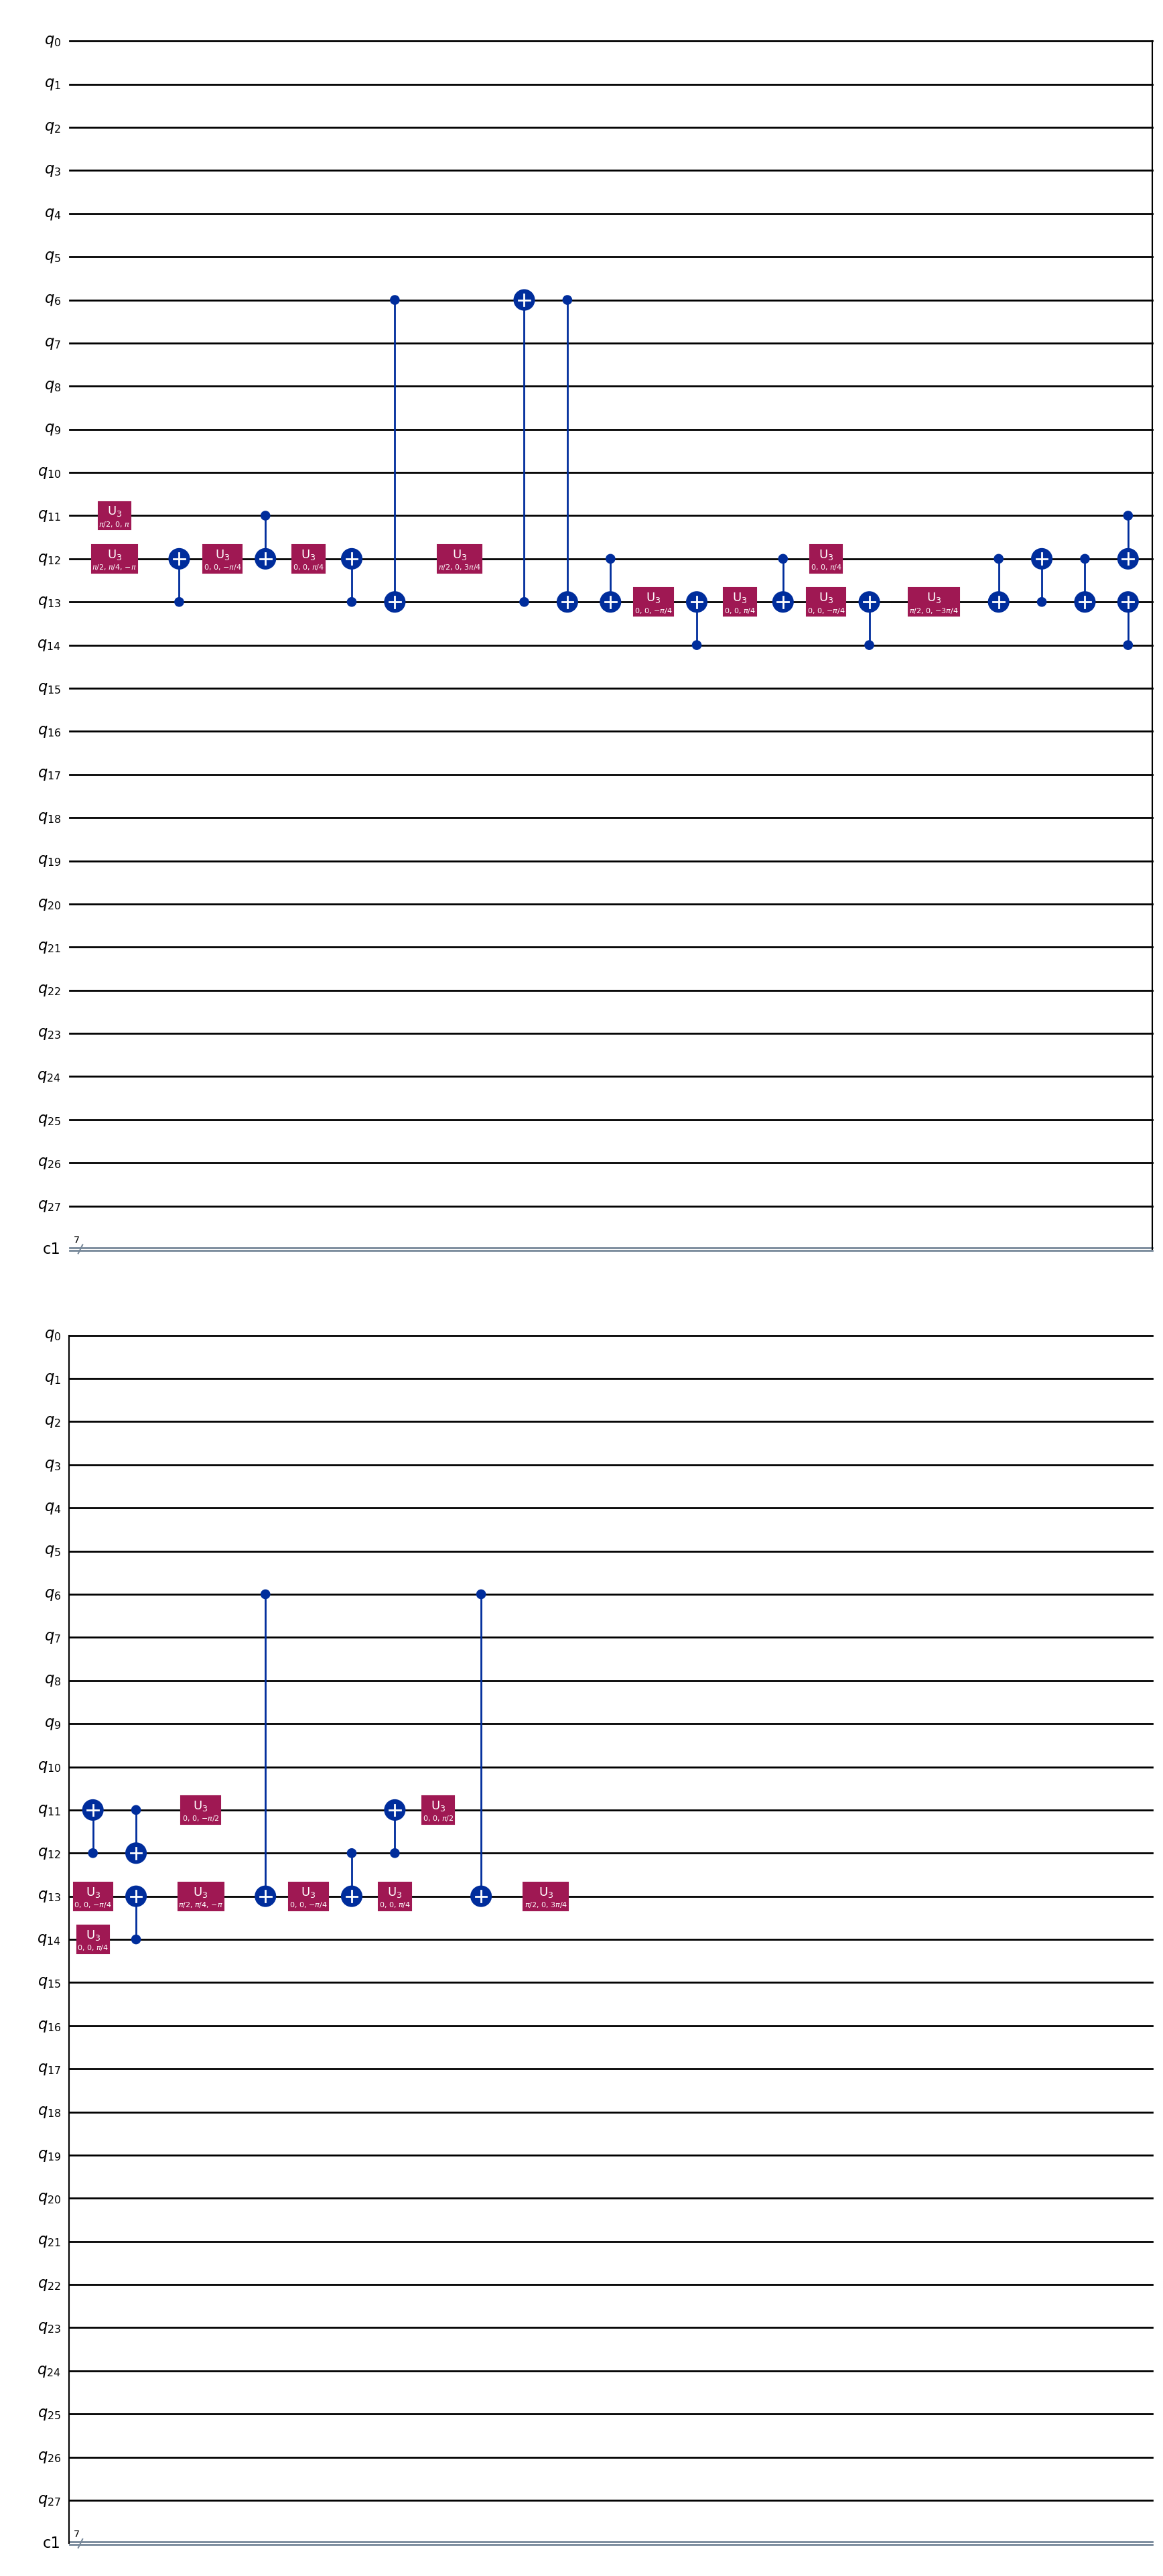

In [58]:
qc_compiled.decompose().draw('mpl')

In [59]:
qc_manually_compiled = transpile(qc3,backend,initial_layout=[3,4,1,0,2,5,6])

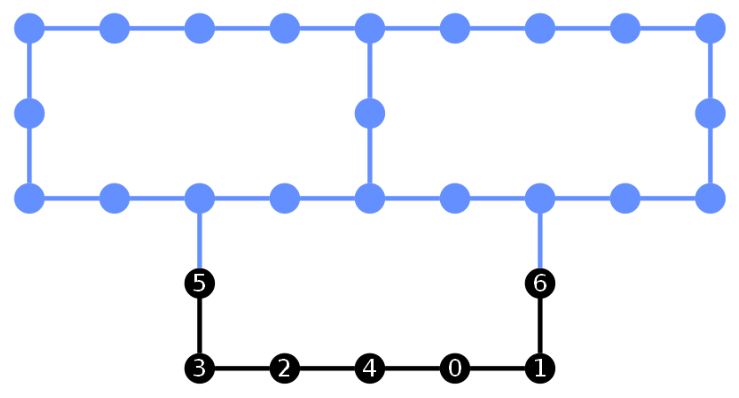

In [60]:
plot_circuit_layout(qc_manually_compiled,backend)

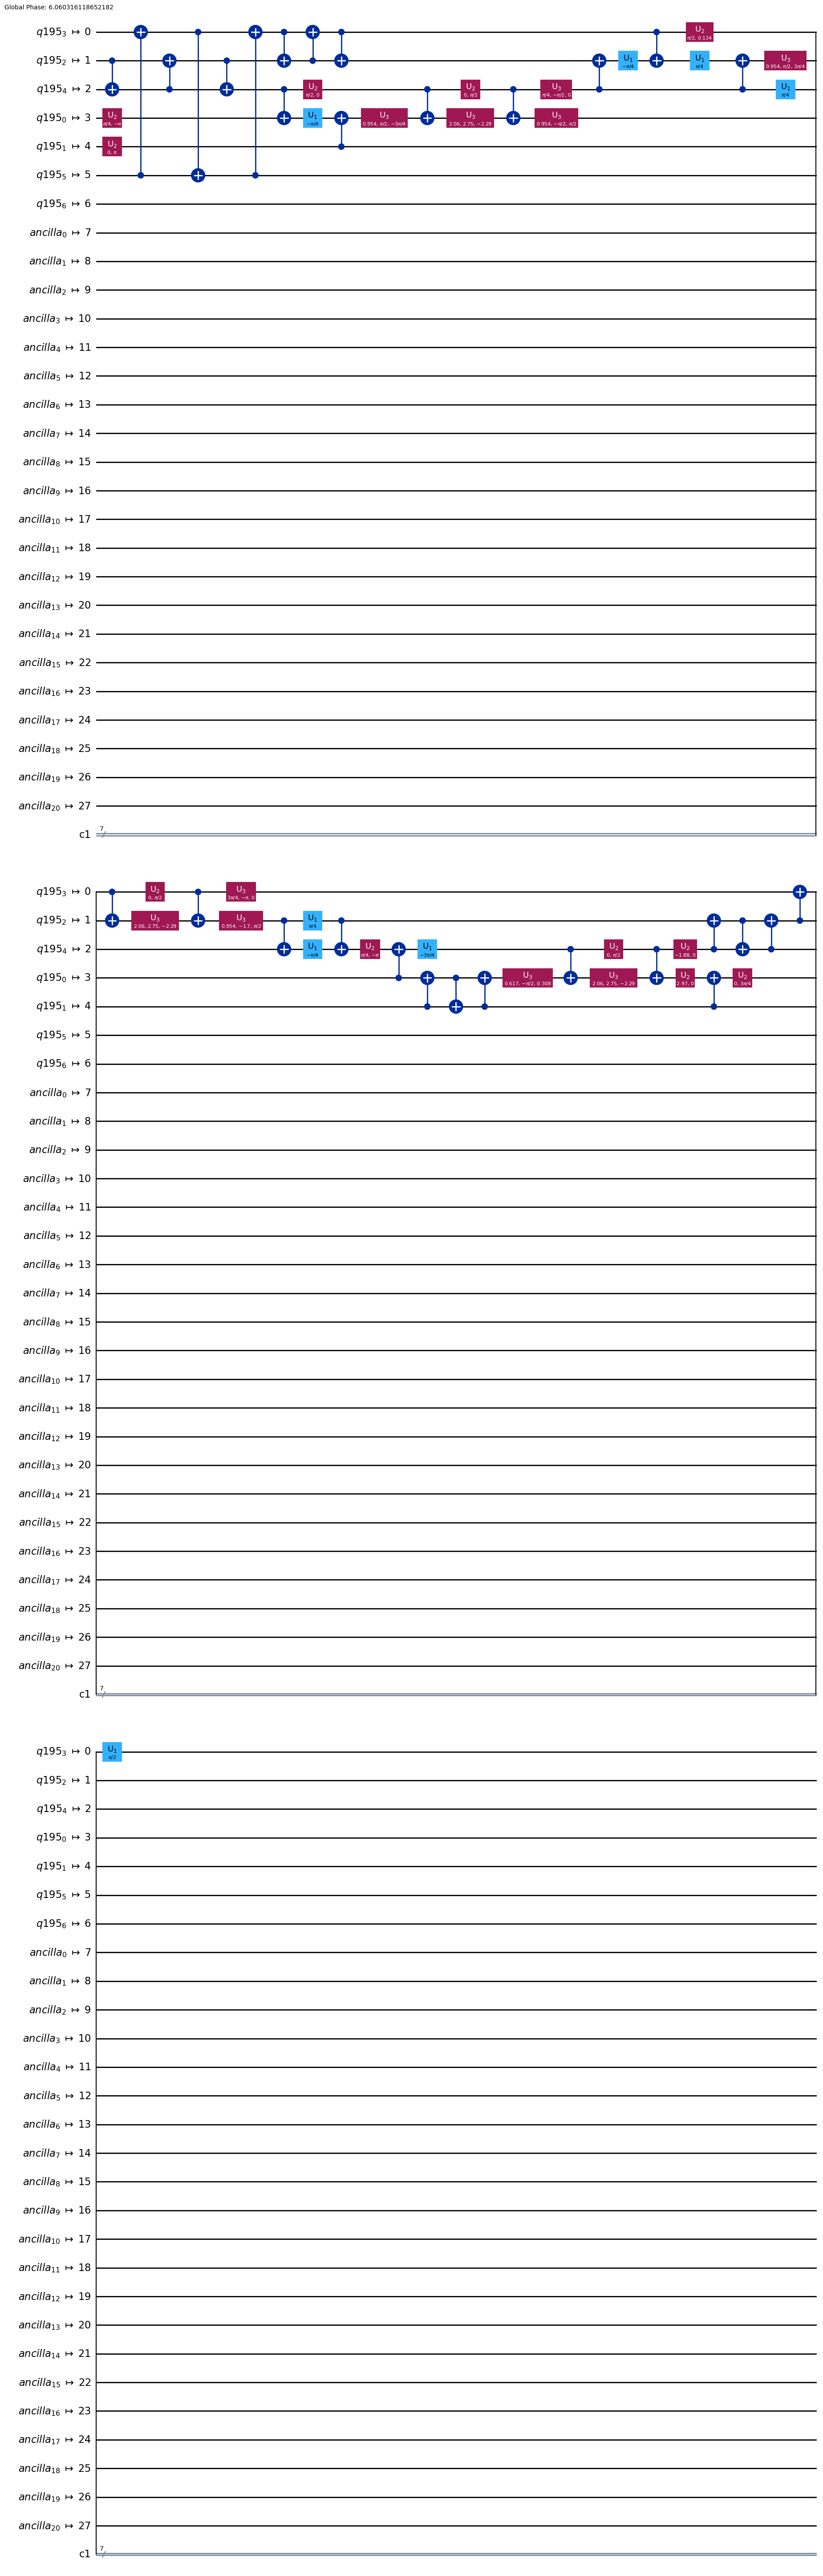

In [61]:
qc_manually_compiled.draw('mpl')

In [62]:
qc_compiled.depth()

30

In [63]:
qc_manually_compiled.depth()

39

In [70]:
for i in range(4):
    qc_compiled_optimization = transpile(qc3,backend,optimization_level=i)
    print('Optimization level',i)
    print('Depth',qc_compiled_optimization.depth())
    print('Gate counts',qc_compiled_optimization.count_ops())

Optimization level 0
Depth 49
Gate counts OrderedDict({'cx': 52, 'u1': 17, 'u2': 8, 'measure': 7})
Optimization level 1
Depth 31
Gate counts OrderedDict({'cx': 25, 'u1': 12, 'measure': 7, 'u2': 6})
Optimization level 2
Depth 28
Gate counts OrderedDict({'cx': 20, 'u1': 10, 'u2': 7, 'measure': 7, 'u3': 4})
Optimization level 3
Depth 31
Gate counts OrderedDict({'cx': 22, 'u1': 12, 'measure': 7, 'u2': 6})


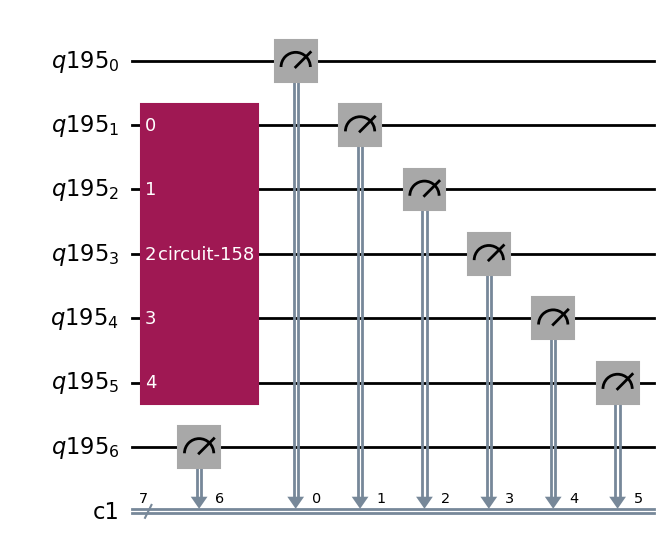

In [67]:
for i in range(7):
    qc3.measure(q3[i],c3[i])
qc3.draw('mpl')

In [71]:
qc0 = transpile(qc3,backend,optimization_level=0)
qc1 = transpile(qc3,backend,optimization_level=1)
qc2 = transpile(qc3,backend,optimization_level=2)
qc3 = transpile(qc3,backend,optimization_level=3)

In [72]:
qc_list = [qc0,qc1,qc2,qc3]
job = backend.run(qc_list,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'1110000': 1, '0100011': 100, '1000111': 1, '0110110': 1, '0000001': 31, '0101010': 48, '0001001': 6, '0100001': 97, '0001010': 12, '0101011': 22, '0000010': 64, '0001011': 10, '0100010': 200, '0100111': 8, '0000000': 47, '0101001': 25, '0101000': 47, '0100000': 183, '0101100': 3, '0000011': 20, '0111001': 2, '0000111': 1, '0110000': 8, '0101110': 3, '1000011': 1, '0000101': 3, '0110010': 8, '0110001': 5, '0000110': 2, '1100011': 1, '0110011': 4, '0000100': 1, '0101101': 5, '0001000': 18, '0100101': 3, '0111011': 2, '0001101': 1, '0100100': 5, '0010000': 2, '1001001': 1, '0111000': 3, '0100110': 2, '0111010': 3, '0010010': 4, '1100001': 1, '1100010': 3, '0010001': 1, '1100000': 1, '0011000': 1, '0010011': 1, '1101001': 1, '1100101': 1}, {'0100001': 18, '0001010': 56, '0000001': 24, '0101010': 42, '1000110': 1, '0000000': 208, '0101000': 43, '0001000': 51, '0001011': 4, '0100010': 114, '0101011': 4, '0000010': 144, '0110010': 1, '0101110': 2, '0000101': 4, '0100000': 168, '0001111': 1

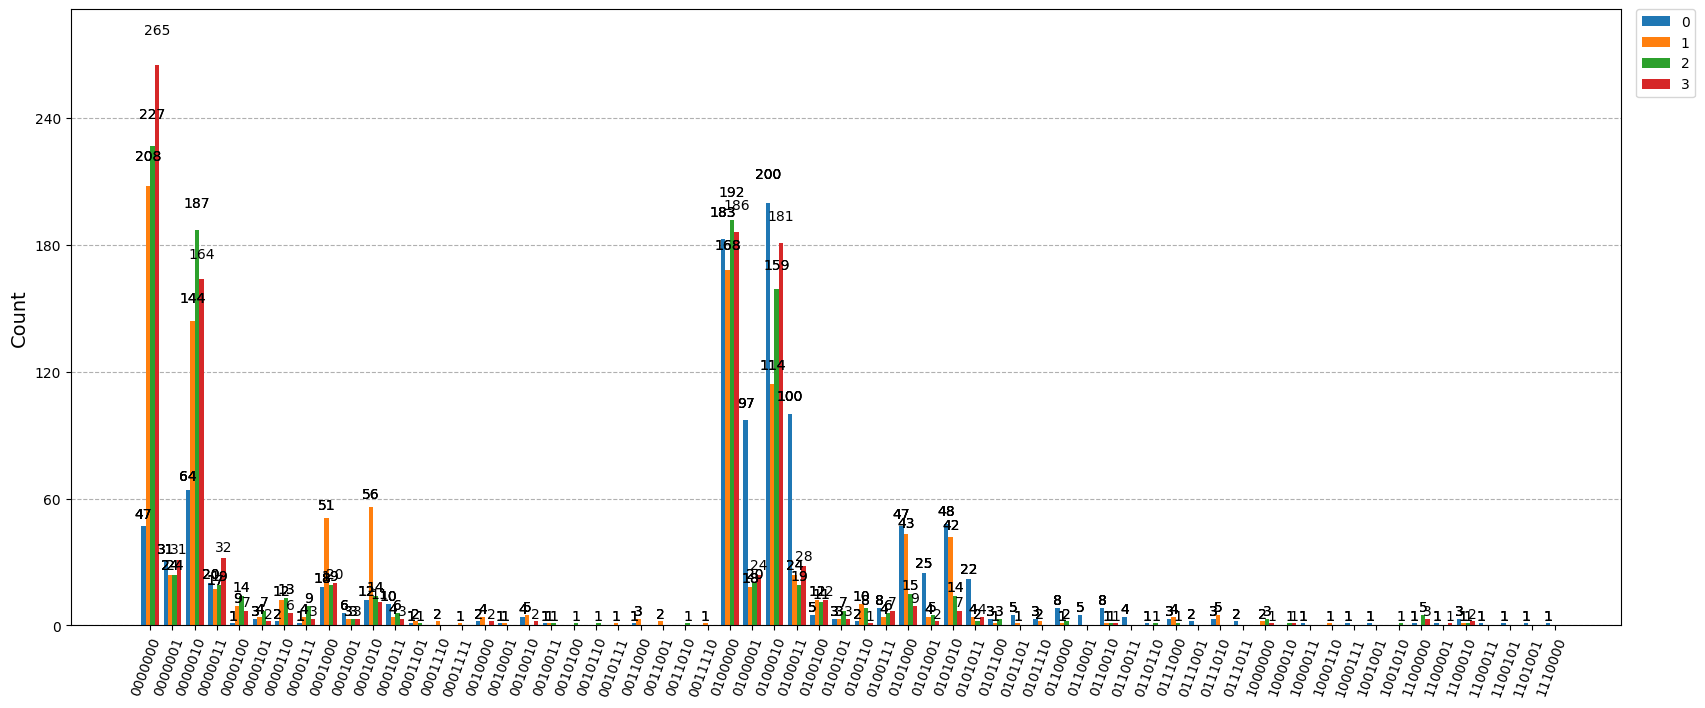

In [73]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8),legend=['0','1','2','3'])